In [11]:
import numpy as np
import pandas as pd
import cv2
import os
import tensorflow as tf
from glob import glob

# **image Preprocess**

In [12]:
images_path = 'flickr8k-sau/Flickr_Data/Images/'
images = glob(images_path+'*.jpg')
len(images)

8091

In [13]:
images[:5]

['flickr8k-sau/Flickr_Data/Images/3371266735_43150bce52.jpg',
 'flickr8k-sau/Flickr_Data/Images/3281611946_f42deed2e1.jpg',
 'flickr8k-sau/Flickr_Data/Images/2455528149_6c3477fd33.jpg',
 'flickr8k-sau/Flickr_Data/Images/2753531542_ace2c870b7.jpg',
 'flickr8k-sau/Flickr_Data/Images/3712008738_1e1fa728da.jpg']

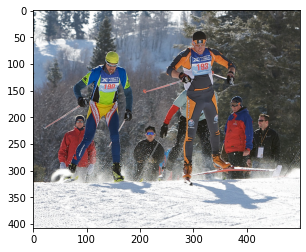

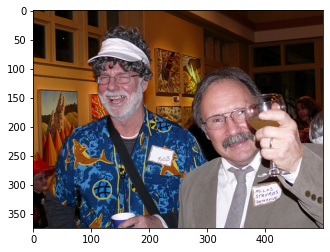

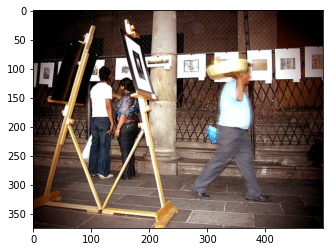

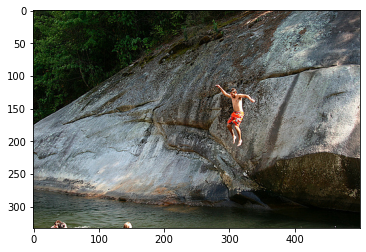

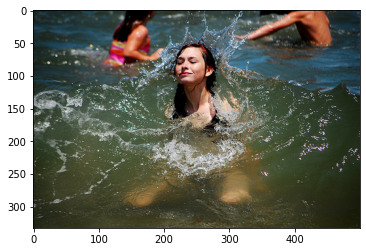

In [14]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [16]:
from tensorflow.keras.applications import ResNet50

incept_model = ResNet50(include_top=True)

In [17]:
from keras.models import Model
last = incept_model.layers[-2].output
modele = Model(inputs = incept_model.input,outputs = last)
modele.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [18]:
images_features = {}
count = 0
for i in images:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    
    img = img.reshape(1,224,224,3)
    pred = modele.predict(img).reshape(2048,)
        
    img_name = i.split('/')[-1]
    
    images_features[img_name] = pred
    
    count += 1
    
    if count > 1499:
        break
        
    elif count % 50 == 0:
        print(count)
    
        
    

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450


In [19]:
len(images_features)

1500

# **Text Preprocess**

In [20]:
caption_path = 'flickr8k-sau/Flickr_Data/Flickr_TextData/Flickr8k.token.txt'

In [21]:
captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')

In [22]:
len(captions)

40461

In [23]:
captions_dict = {}
for i in captions:
    try:
        img_name = i.split('\t')[0][:-2] 
        caption = i.split('\t')[1]
        if img_name in images_features:
            if img_name not in captions_dict:
                captions_dict[img_name] = [caption]
                
            else:
                captions_dict[img_name].append(caption)
            
    except:
        pass

In [24]:
len(captions_dict)

1500

# **Visualize Images with captions**

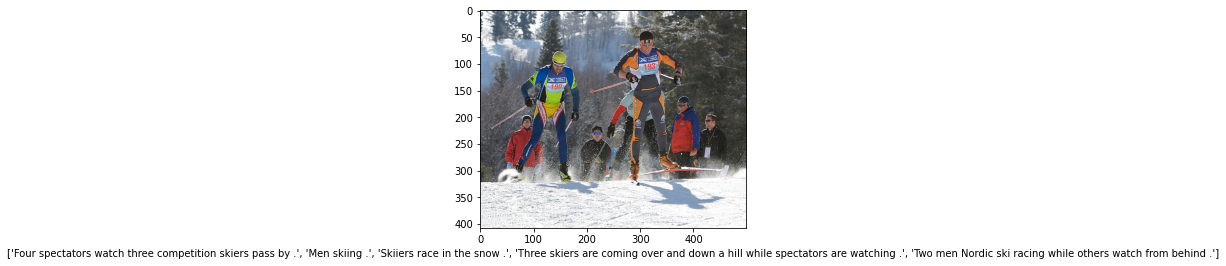

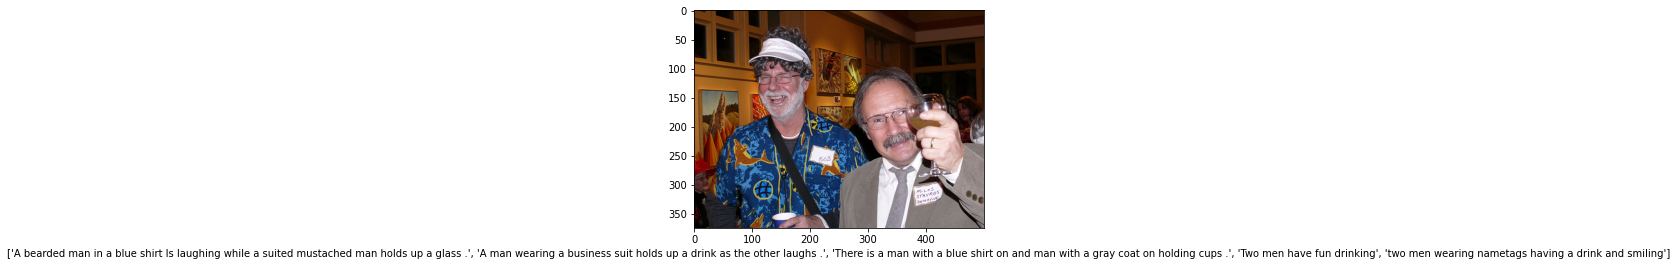

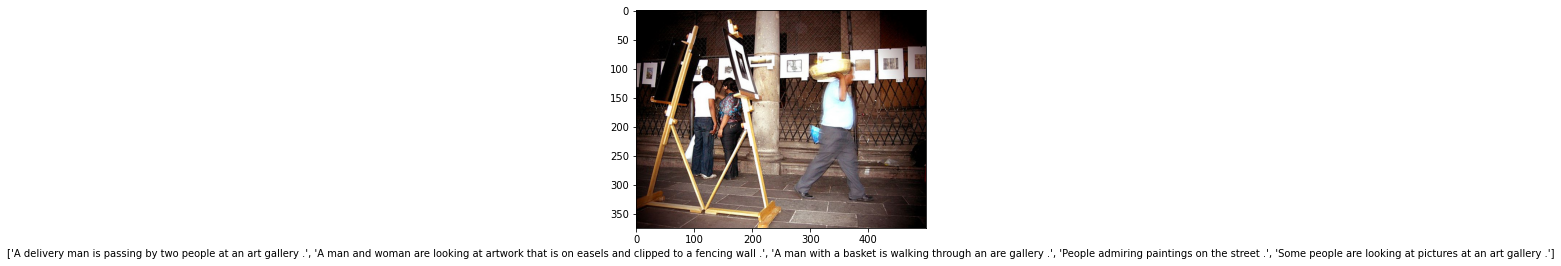

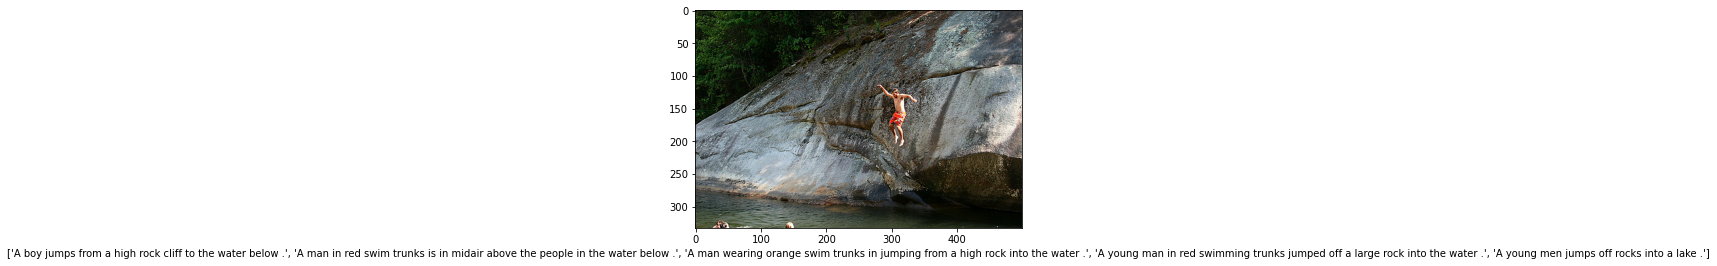

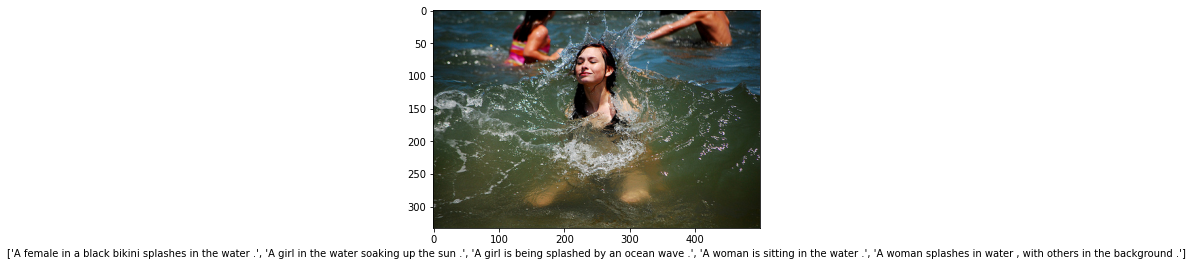

In [25]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img_name = images[i]
    
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)

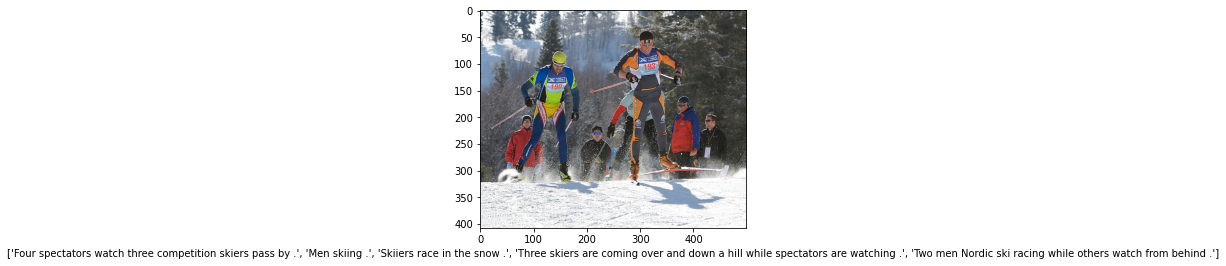

In [26]:
import matplotlib.pyplot as plt

for k in images_features.keys():
    plt.figure()
    
    img_name = 'flickr8k-sau/Flickr_Data/Images/' + k
    
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)
    
    break

In [27]:

def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    return modified
    

In [28]:
for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)

# **Create Vocabulary**

In [29]:
count_words = {}
for k,vv in captions_dict.items():
    for v in vv:
        for word in v.split():
            if word not in count_words:

                count_words[word] = 0

            else:
                count_words[word] += 1

In [30]:
len(count_words)

4055

In [31]:
THRESH = -1
count = 1
new_dict = {}
for k,v in count_words.items():
    if count_words[k] > THRESH:
        new_dict[k] = count
        count += 1
        

In [32]:
len(new_dict)

4055

In [33]:
new_dict['<OUT>'] = len(new_dict) 

In [34]:
captions_backup = captions_dict.copy()

In [35]:
captions_dict = captions_backup.copy()

In [36]:
for k, vv in captions_dict.items():
    for v in vv:
        encoded = []
        for word in v.split():  
            if word not in new_dict:
                encoded.append(new_dict['<OUT>'])
            else:
                encoded.append(new_dict[word])


        captions_dict[k][vv.index(v)] = encoded

In [37]:
captions_dict

{'1009434119_febe49276a.jpg': [[1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   2,
   10,
   11,
   12,
   13,
   2,
   5,
   14,
   15,
   16],
  [1, 2, 3, 4, 5, 6, 7, 8, 17, 18, 19, 15, 16],
  [1, 2, 20, 21, 7, 8, 9, 18, 19, 15, 16],
  [1, 2, 20, 21, 7, 8, 22, 23, 24, 19, 9, 25, 26, 2, 5, 14, 15, 16],
  [1, 2, 6, 27, 22, 18, 24, 19, 28, 2, 29, 14, 15, 16]],
 '1015584366_dfcec3c85a.jpg': [[1, 2, 3, 6, 30, 31, 2, 32, 15, 16],
  [1, 2, 33, 6, 7, 34, 31, 2, 35, 36, 15, 16],
  [1, 2, 37, 3, 6, 30, 2, 35, 32, 15, 16],
  [1, 2, 38, 3, 4, 33, 6, 9, 2, 39, 40, 41, 31, 2, 35, 36, 15, 16],
  [1, 18, 3, 6, 42, 18, 36, 43, 15, 16]],
 '101654506_8eb26cfb60.jpg': [[1, 2, 44, 4, 5, 6, 7, 8, 17, 18, 45, 15, 16],
  [1, 2, 6, 7, 8, 9, 18, 45, 16],
  [1, 2, 6, 8, 17, 45, 15, 16],
  [1, 2, 5, 4, 44, 6, 7, 8, 17, 2, 45, 46, 47, 15, 16],
  [1, 18, 5, 4, 44, 6, 7, 8, 31, 18, 48, 26, 18, 45, 15, 16]],
 '102351840_323e3de834.jpg': [[1, 2, 49, 50, 2, 51, 9, 18, 52, 15, 16],
  [1, 2, 49, 7, 50, 17, 18, 53

------------------------------------------------------------------------------------------------------

# **Build Generator Function**

In [38]:
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

In [39]:
MAX_LEN = 0
for k, vv in captions_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)
            print(v)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 2, 10, 11, 12, 13, 2, 5, 14, 15, 16]
[1, 2, 165, 115, 76, 79, 166, 167, 168, 2, 78, 131, 18, 114, 9, 25, 26, 2, 169, 15, 16]
[1, 67, 209, 49, 210, 211, 4, 212, 22, 2, 213, 156, 67, 214, 108, 215, 216, 217, 60, 218, 15, 16]
[1, 2, 90, 193, 2, 5, 232, 4, 110, 7, 272, 235, 2, 227, 76, 2, 278, 239, 22, 18, 279, 15, 16]
[1, 2, 49, 9, 2, 74, 110, 4, 306, 7, 307, 235, 308, 2, 191, 6, 22, 2, 309, 76, 310, 311, 312, 15, 16]
[1, 58, 437, 616, 541, 413, 245, 86, 2, 617, 465, 474, 193, 2, 74, 4, 3, 110, 222, 18, 413, 7, 193, 2, 618, 619, 15, 16]
[1, 2, 90, 9, 67, 163, 369, 4, 804, 7, 464, 22, 2, 174, 72, 101, 2, 549, 90, 9, 2, 74, 69, 105, 98, 65, 265, 22, 18, 72, 805, 265, 806, 807, 16]
[1, 67, 1617, 49, 193, 2, 24, 1388, 4, 39, 955, 7, 182, 180, 1618, 1615, 1619, 9, 25, 26, 79, 465, 222, 101, 56, 22, 2, 267, 242, 9, 25, 26, 2, 147, 26, 59, 94, 1620, 15, 16]


In [40]:
MAX_LEN

40

In [ ]:
captions_dict

In [ ]:
Batch_size = 5000
VOCAB_SIZE = len(new_dict)

def generator(photo, caption):
    n_samples = 0
    
    X = []
    y_in = []
    y_out = []
    
    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                X.append(photo[k])

                in_seq= [v[:i]]
                out_seq = v[i]

                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
            
    return X, y_in, y_out
    
    

In [33]:
X, y_in, y_out = generator(images_features, captions_dict)

In [34]:
len(X), len(y_in), len(y_out)

(94860, 94860, 94860)

In [ ]:
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')



In [1]:
X.shape, y_in.shape, y_out.shape

NameError: name 'X' is not defined

In [ ]:
X[1510]

In [ ]:
y_in[2]

# **MODEL**

In [ ]:

from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model

In [ ]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(new_dict)

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

# model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

In [ ]:
model.fit([X, y_in], y_out, batch_size=512, epochs=50)

In [ ]:
inv_dict = {v:k for k, v in new_dict.items()}

In [ ]:
model.save('model.h5')

In [ ]:
model.save_weights('mine_model_weights.h5')

In [ ]:
np.save('vocab.npy', new_dict)

In [ ]:
def getImage(x):
    
    test_img_path = images[x]

    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (299,299))

    test_img = np.reshape(test_img, (1,299,299,3))
    
    return test_img

# **Predictions**

In [ ]:
for i in range(5):
    
    no = np.random.randint(1500,7000,(1,1))[0,0]
    test_feature = modele.predict(getImage(no)).reshape(1,2048)
    
    test_img_path = images[no]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


    text_inp = ['startofseq']

    count = 0
    caption = ''
    while count < 25:
        count += 1

        encoded = []
        for i in text_inp:
            encoded.append(new_dict[i])

        encoded = [encoded]

        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)


        prediction = np.argmax(model.predict([test_feature, encoded]))

        sampled_word = inv_dict[prediction]

       
        if sampled_word == 'endofseq':
            break
        caption = caption + ' ' + sampled_word
        text_inp.append(sampled_word)

        
        
    plt.figure()
    plt.imshow(test_img)
    plt.xlabel(caption.split('.')[0])